# Machine Learning Assignment | Classification | Ismayil Ismayilov | St. Num: 444459

In [6]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

import seaborn as sns
import matplotlib.pyplot as plt

### Base function to show the Balanced Accuracy Score, the Classification Report and Confusion Matrix

In [7]:
def Results(y_true, y_pred):
    print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_true, y_pred)}')

    print(classification_report(y_true, y_pred))

    ax = plt.subplot()

    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='g', ax=ax)

    ax.set_title('Confusion matrix')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

    plt.show()

## Reading the Data

Please, input Data's location below.

In [8]:
drugs_df = pd.read_csv('drugs_train.csv')

In [9]:
drugs_df.head()

,id,age,gender,education,country,ethnicity,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,...,personality_impulsiveness,personality_sensation,consumption_alcohol,consumption_amphetamines,consumption_caffeine,consumption_cannabis,consumption_chocolate,consumption_mushrooms,consumption_nicotine,consumption_cocaine_last_month
0,train_0001,45-54,male,Masters degree,USA,Mixed-Black/Asian,57.6,57.3,50.1,47.8,...,42.8,22.4,used in last week,used over a decade ago,used in last day,used in last week,used in last day,never used,used in last week,No
1,train_0002,25-34,male,University degree,USA,Mixed-Black/Asian,47.8,67.0,45.7,47.8,...,33.8,30.8,used in last week,never used,used in last week,never used,used in last day,never used,never used,No
2,train_0003,18-24,female,University degree,USA,Mixed-Black/Asian,57.6,43.3,55.3,45.6,...,63.0,62.0,used in last month,never used,used in last day,used in last week,used in last week,used in last year,used in last month,No
3,train_0004,25-34,female,Masters degree,USA,Mixed-Black/Asian,71.8,31.2,43.6,56.3,...,63.0,71.1,used in last day,never used,used in last day,used in last decade,used in last day,never used,used in last decade,No
4,train_0005,18-24,male,"Some college or university, no certificate or ...",Australia,Mixed-Black/Asian,56.1,62.3,70.2,66.1,...,50.4,62.0,used in last week,never used,used in last month,used in last month,used in last day,used in last year,used in last month,No


Below we see every variable has 1500 observation; hence no missing observartions.

In [10]:
drugs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1500 non-null   object 
 1   age                             1500 non-null   object 
 2   gender                          1500 non-null   object 
 3   education                       1500 non-null   object 
 4   country                         1500 non-null   object 
 5   ethnicity                       1500 non-null   object 
 6   personality_neuroticism         1500 non-null   float64
 7   personality_extraversion        1500 non-null   float64
 8   personality_openness            1500 non-null   float64
 9   personality_agreeableness       1500 non-null   float64
 10  personality_conscientiousness   1500 non-null   float64
 11  personality_impulsiveness       1500 non-null   float64
 12  personality_sensation           15

## Exploratory Data Analysis

Personality trait variables are all in a range of [0-100] without an outlier.

In [11]:
drugs_df.describe()

,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,personality_conscientiousness,personality_impulsiveness,personality_sensation
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,51.507267,50.053667,53.108667,49.966000,49.998800,46.972200,52.316333
std,14.958815,15.200954,16.049880,14.340301,14.571548,17.361892,23.686221
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.300000,39.400000,41.400000,41.200000,40.600000,33.800000,38.800000
50%,52.000000,50.100000,52.700000,49.800000,49.900000,42.800000,54.000000
75%,60.800000,59.700000,64.700000,58.500000,58.400000,56.500000,71.100000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## Key Stats from SDA:

1. Genderwise, dataset is balanced: 50-50% | Male&Female
2. Data mostly is based on 18-34 years old as they takes more than 50% of the dataset.
3. 91.5% of the people are Mixed-Black/Asian
4. The US and Australia takes 84% of the data.

###### Note: Except the gender, Age, Race and Country are not balanced, so it may have adverse effects in models efficiency to predict. For example, the model have lower accuracy in prediction for someone who is White, aged 55-64, from Canada

In [12]:
print(drugs_df['gender'].value_counts(normalize=True, sort=True) * 100)

female    50.066667
male      49.933333
Name: gender, dtype: float64


In [13]:
drugs_df['age'].value_counts()

18-24    528
25-34    375
35-44    278
45-54    233
55-64     72
65+       14
Name: age, dtype: int64

In [14]:
print(drugs_df['consumption_alcohol'].value_counts(normalize=True, sort=True) * 100)

used in last week         40.066667
used in last day          26.600000
used in last month        15.666667
used in last year         10.533333
used in last decade        3.600000
used over a decade ago     1.800000
never used                 1.733333
Name: consumption_alcohol, dtype: float64


In [15]:
print(drugs_df['education'].value_counts(normalize=True, sort=True) * 100)

Some college or university, no certificate or degree    27.000000
University degree                                       25.066667
Masters degree                                          15.266667
Professional certificate/ diploma                       14.733333
Left school at 18 years                                  5.666667
Left school at 16 years                                  4.800000
Doctorate degree                                         4.400000
Left school at 17 years                                  1.733333
Left school before 16 years                              1.333333
Name: education, dtype: float64


In [16]:
print(drugs_df['ethnicity'].value_counts(normalize=True, sort=True) * 100)

Mixed-Black/Asian    91.466667
Mixed-White/Black     3.133333
Asian                 1.666667
Black                 1.466667
Other                 1.066667
Mixed-White/Asian     1.000000
White                 0.200000
Name: ethnicity, dtype: float64


In [17]:
print(drugs_df['country'].value_counts(normalize=True, sort=True) * 100)

USA            54.066667
Australia      30.666667
New Zealand     6.266667
UK              4.866667
Other           2.933333
Ireland         0.866667
Canada          0.333333
Name: country, dtype: float64


### Drug Consumption

The data includes three types of drugs: Amphetamins, Cannabis, Mushrooms. Based on the data:

1. Around half of the people never used Amphetamine and Mushrooms, where only 21.6% people never used Cannabis.
2. Cannabis usage data is well balanced compared to other drug usage data.

In [18]:
drugs_df['consumption_amphetamines'].value_counts(normalize=True, sort=True) * 100

never used                52.266667
used in last decade       12.466667
used over a decade ago    12.133333
used in last year         10.400000
used in last day           5.333333
used in last month         3.800000
used in last week          3.600000
Name: consumption_amphetamines, dtype: float64

In [19]:
drugs_df['consumption_cannabis'].value_counts(normalize=True, sort=True) * 100

used in last day          24.866667
never used                21.600000
used in last decade       13.800000
used in last year         11.400000
used over a decade ago    11.200000
used in last week         10.066667
used in last month         7.066667
Name: consumption_cannabis, dtype: float64

In [20]:
drugs_df['consumption_mushrooms'].value_counts(normalize=True, sort=True) * 100

never used                51.466667
used in last year         14.533333
used in last decade       13.866667
used over a decade ago    10.733333
used in last month         6.733333
used in last week          2.400000
used in last day           0.266667
Name: consumption_mushrooms, dtype: float64

### Education

The Education data reflects nearly reality. Around 50% had attained a diploma. Where 27% has an education in some college or university, but no certificate or degree.

In [21]:
drugs_df['education'].value_counts(normalize=True, sort=True) * 100

Some college or university, no certificate or degree    27.000000
University degree                                       25.066667
Masters degree                                          15.266667
Professional certificate/ diploma                       14.733333
Left school at 18 years                                  5.666667
Left school at 16 years                                  4.800000
Doctorate degree                                         4.400000
Left school at 17 years                                  1.733333
Left school before 16 years                              1.333333
Name: education, dtype: float64

## Feature engineering

In Feature Engineering process we add:
1. A new feature to track "consumed illicit drugs" observations: Binary: 1 Yes, 0 No.
2. Features to track total number of used/taken drugs (excluding chocolate and caffeine) in different periods.


In [22]:
def Feature(df: pd.DataFrame):
    df = df.assign(no_illicit_drugs=((df[['consumption_amphetamines', 'consumption_cannabis', 'consumption_mushrooms']] == 'never used').sum(axis=1) == 3).astype(int))
  
    # TAD stands for Total Amount of Drugs consumed
    periods = [('used in last day', 'TAD_last_day'),
               ('used in last week', 'TAD_last_week'),
               ('used in last month', 'TAD_last_month'),
               ('used in last year', 'TAD_last_year'),
               ('used in last decade', 'TAD_last_decade'),
               ('used over a decade ago', 'TAD_decade_ago')]

    for period, column_name in periods:
        df = df.assign(**{column_name: (df[['consumption_alcohol',
                'consumption_amphetamines', 
                'consumption_cannabis',
                'consumption_mushrooms', 'consumption_nicotine']] == period).sum(axis=1)})

    return df

In [23]:
drugs_df = Feature(drugs_df)

In [24]:
drugs_df.head()

,id,age,gender,education,country,ethnicity,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,...,consumption_mushrooms,consumption_nicotine,consumption_cocaine_last_month,no_illicit_drugs,TAD_last_day,TAD_last_week,TAD_last_month,TAD_last_year,TAD_last_decade,TAD_decade_ago
0,train_0001,45-54,male,Masters degree,USA,Mixed-Black/Asian,57.6,57.3,50.1,47.8,...,never used,used in last week,No,0,0,3,0,0,0,1
1,train_0002,25-34,male,University degree,USA,Mixed-Black/Asian,47.8,67.0,45.7,47.8,...,never used,never used,No,1,0,1,0,0,0,0
2,train_0003,18-24,female,University degree,USA,Mixed-Black/Asian,57.6,43.3,55.3,45.6,...,used in last year,used in last month,No,0,0,1,2,1,0,0
3,train_0004,25-34,female,Masters degree,USA,Mixed-Black/Asian,71.8,31.2,43.6,56.3,...,never used,used in last decade,No,0,1,0,0,0,2,0
4,train_0005,18-24,male,"Some college or university, no certificate or ...",Australia,Mixed-Black/Asian,56.1,62.3,70.2,66.1,...,used in last year,used in last month,No,0,0,1,2,1,0,0


## Data Cleaning

### Key takeaways:

1. The "ID" variable has no use, so we drop it
2. "consumption_cocaine_last_month" variable is Binary (Yes/No), for SKLERN we need to label them 1 and 0, respectively.
3. Age, Consumption, Education variable are not ordered, we provide an order as ordinals.

In [25]:
age_order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

education_order = ['Left school before 16 years',
                   'Left school at 16 years',
                   'Left school at 17 years',
                   'Left school at 18 years',
                   'Some college or university, no certificate or degree',
                   'Professional certificate/ diploma',
                   'University degree',
                   'Masters degree',
                   'Doctorate degree']

consumption_order = ['never used',
                     'used over a decade ago',
                     'used in last decade',
                     'used in last year',
                     'used in last month',
                     'used in last week',
                     'used in last day']

consumption_columns = ['consumption_alcohol',
                       'consumption_amphetamines', 'consumption_caffeine',
                       'consumption_cannabis', 'consumption_chocolate',
                       'consumption_mushrooms', 'consumption_nicotine']

def clean_df(df: pd.DataFrame, train_data:bool=True) -> pd.DataFrame:
    df = df.drop('id', axis=1)
    if train_data:
        df['consumption_cocaine_last_month'] = df['consumption_cocaine_last_month'].replace({'No': 0, 'Yes': 1})
    df['age'] = df['age'].apply(lambda e: age_order.index(e))
    df['education'] = df['education'].apply(lambda e: education_order.index(e))

    for consumption_column in consumption_columns:
        df[consumption_column] = df[consumption_column].apply(lambda e: consumption_order.index(e))
    
    return df

In [26]:
drugs_df = clean_df(drugs_df)

In [27]:
drugs_df.head()

,age,gender,education,country,ethnicity,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,personality_conscientiousness,...,consumption_mushrooms,consumption_nicotine,consumption_cocaine_last_month,no_illicit_drugs,TAD_last_day,TAD_last_week,TAD_last_month,TAD_last_year,TAD_last_decade,TAD_decade_ago
0,3,male,7,USA,Mixed-Black/Asian,57.6,57.3,50.1,47.8,53.7,...,0,5,0,0,0,3,0,0,0,1
1,1,male,6,USA,Mixed-Black/Asian,47.8,67.0,45.7,47.8,56.0,...,0,0,0,1,0,1,0,0,0,0
2,0,female,6,USA,Mixed-Black/Asian,57.6,43.3,55.3,45.6,49.9,...,3,4,0,0,0,1,2,1,0,0
3,1,female,7,USA,Mixed-Black/Asian,71.8,31.2,43.6,56.3,31.8,...,0,2,0,0,1,0,0,0,2,0
4,0,male,4,Australia,Mixed-Black/Asian,56.1,62.3,70.2,66.1,42.4,...,3,4,0,0,0,1,2,1,0,0


## General Notes

1. The ideal split is said to be 80:20 for training and testing. In our data, the observation count is not high, so it will be easier to have a good results in such case. That's why we continue with 70:30 split.
2. Random split each time to check consistency of results for each model. 
3. Preprocess the data: categorical feature encoding, numeric feature scaling
4. OneHotEncoder: Encode categorical integer features using a one-hot aka one-of-K scheme.
5. Fine-tune hyperparameters using grid search with 3-fold cross-validation. Due to limited datasize, we go with 3-fold instead of 5.
6. Model is retrained on the whole training set using the best hyperparameters obtained using grid search.
7. Checking overfitting by comparing "Balanced accuracy" of training and test sets.

#### The best model is chosen based on the highest "Balanced Accuracy".


## Dataset splitting

In [28]:
cat_features = ['gender', 'country', 'ethnicity']

num_features = ['personality_neuroticism', 'personality_extraversion',
                 'personality_openness', 'personality_agreeableness',
                 'personality_conscientiousness', 'personality_impulsiveness',
                 'personality_sensation', 'no_illicit_drugs', 'TAD_last_day', 'TAD_last_week',
                 'TAD_last_month', 'TAD_last_year',
                 'TAD_last_decade', 'TAD_decade_ago']

ordinal_features = ['age', 'education', 'consumption_alcohol',
                    'consumption_amphetamines', 'consumption_caffeine',
                    'consumption_cannabis', 'consumption_chocolate',
                    'consumption_mushrooms', 'consumption_nicotine']

target = 'consumption_cocaine_last_month'

For ordered features we'll manually provide the order of levels to be used in transformations:

In [29]:
X = drugs_df[cat_features + num_features + ordinal_features]
y = drugs_df[target]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7)

## Benchmark

Dummy Classifier prediction has a 0.5 Balanced Accuracy Score. Our intention is to increase the Accuracy, higher is the better.

In [31]:
dummy_classifier = DummyClassifier()
dummy_classifier.fit(X_train, y_train)

balanced_accuracy_score(y_train, dummy_classifier.predict(X_train))

0.5

## Logistic regression

Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature. Logistic regression is most commonly used when the data in question has binary output, so when it belongs to one class or another, or is either a 0 or 1.

Regularization is a way to avoid overfitting by penalizing high-valued regression coefficients:
Regularization works by biasing data towards particular values (such as small values near zero). The bias is achieved by adding a tuning parameter to encourage those values:
1. L1 regularization adds an L1 penalty equal to the absolute value of the magnitude of coefficients. In other words, it limits the size of the coefficients.
2. L2 regularization adds an L2 penalty equal to the square of the magnitude of coefficients. L2 will not yield sparse models and all coefficients are shrunk by the same factor.
3. C Hyperparameter to control the model how to choose parameters.

In [32]:
ohe_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

scaler = MinMaxScaler()
transformers = ColumnTransformer([('categorical', ohe_transformer, cat_features),
                                  ('numeric', scaler, num_features)], remainder='passthrough')
logreg_pipeline = Pipeline(steps=[('transform', transformers),
                                  ('logreg', LogisticRegression(solver='liblinear', class_weight='balanced'))])

In [33]:
logreg_param_grid = {'logreg__penalty' : ['l1', 'l2'],
                     'logreg__C' : np.logspace(-4, 4, 20)}

In [34]:
log_search = GridSearchCV(logreg_pipeline, logreg_param_grid, scoring='balanced_accuracy', cv=3)

In [35]:
log_search.fit(X_train, y_train)

/Users/smile/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/smile/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['gender',
                                                                          'country',
                                                                          'ethnicity']),
                                                                        ('numeric',
                                                                         MinMaxScaler(),
                                                                         ['personality_neuroticism',
                                                                          'personality_extraversion',
                                                                          'personality_openness',
                                                                          'personality_agreeableness',
                                                                          'pers...
             param_grid={'logreg__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'logreg__penalty': ['l1', 'l2']},
             scoring='balanced_accuracy')

In [36]:
log_search.best_estimator_

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'country',
                                                   'ethnicity']),
                                                 ('numeric', MinMaxScaler(),
                                                  ['personality_neuroticism',
                                                   'personality_extraversion',
                                                   'personality_openness',
                                                   'personality_agreeableness',
                                                   'personality_conscientiousness',
                                                   'personality_impulsiveness',
                                                   'personality_sensation',
                                                   'no_illicit_drugs',
                                                   'TAD_last_day',
                                                   'TAD_last_week',
                                                   'TAD_last_month',
                                                   'TAD_last_year',
                                                   'TAD_last_decade',
                                                   'TAD_decade_ago'])])),
                ('logreg',
                 LogisticRegression(C=0.0006951927961775605,
                                    class_weight='balanced',
                                    solver='liblinear'))])

### Classification Report Guide (General Explanation)
1. Precision — What percent of predictions were correct?
2. Recall — What percent of the positive cases caught?
3. F1 score — What percent of positive predictions were correct?

Balanced Accuracy Score: 0.7377906908767786
              precision    recall  f1-score   support

           0       0.98      0.64      0.78       961
           1       0.18      0.83      0.29        89

    accuracy                           0.66      1050
   macro avg       0.58      0.74      0.53      1050
weighted avg       0.91      0.66      0.74      1050



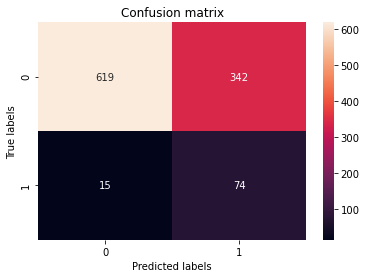

In [37]:
Results(y_train, log_search.predict(X_train))

Balanced Accuracy Score: 0.7171691364333163
              precision    recall  f1-score   support

           0       0.98      0.59      0.74       412
           1       0.16      0.84      0.27        38

    accuracy                           0.61       450
   macro avg       0.57      0.72      0.50       450
weighted avg       0.91      0.61      0.70       450



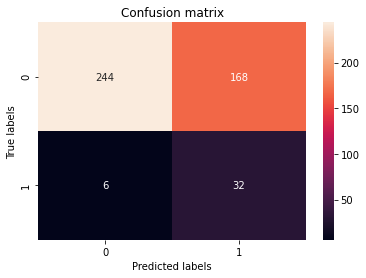

In [38]:
Results(y_test, (log_search.predict(X_test)))

## SVM

Support Vector Machines are one of the most popular and widely used algorithm for dealing with classification problems in machine learning.

Considered Hyperparameters:
1. Kernels: The main function of the kernel is to take low dimensional input space and transform it into a higher-dimensional space. It is mostly useful in non-linear separation problem.
2. Gamma: It defines how far influences the calculation of plausible line of separation. (higher Gamma, nearby points will have high influence)
3. C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimisation how much error is bearable. This is how to control the trade-off between decision boundary and misclassification term.


In [39]:
ohe_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

scaler = MinMaxScaler()
transformers = ColumnTransformer([('categorical', ohe_transformer, cat_features),
                                  ('numeric', scaler, num_features)], remainder='passthrough')
svm_pipeline = Pipeline(steps=[('transform', transformers),
                                  ('svm', SVC(class_weight='balanced'))])

In [40]:
svm_param_grid = {'svm__C': [0.1,1, 10, 100], 'svm__gamma': [1,0.1,0.01,0.001],'svm__kernel': ['rbf', 'poly', 'sigmoid']}

In [41]:
svm_search = GridSearchCV(svm_pipeline, svm_param_grid, scoring='balanced_accuracy', cv=3)

In [42]:
svm_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['gender',
                                                                          'country',
                                                                          'ethnicity']),
                                                                        ('numeric',
                                                                         MinMaxScaler(),
                                                                         ['personality_neuroticism',
                                                                          'personality_extraversion',
                                                                          'personality_openness',
                                                                          'personality_agreeableness',
                                                                          'pers...
                                                                          'personality_impulsiveness',
                                                                          'personality_sensation',
                                                                          'no_illicit_drugs',
                                                                          'TAD_last_day',
                                                                          'TAD_last_week',
                                                                          'TAD_last_month',
                                                                          'TAD_last_year',
                                                                          'TAD_last_decade',
                                                                          'TAD_decade_ago'])])),
                                       ('svm', SVC(class_weight='balanced'))]),
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': [1, 0.1, 0.01, 0.001],
                         'svm__kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='balanced_accuracy')

In [43]:
svm_search.best_estimator_

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'country',
                                                   'ethnicity']),
                                                 ('numeric', MinMaxScaler(),
                                                  ['personality_neuroticism',
                                                   'personality_extraversion',
                                                   'personality_openness',
                                                   'personality_agreeableness',
                                                   'personality_conscientiousness',
                                                   'personality_impulsiveness',
                                                   'personality_sensation',
                                                   'no_illicit_drugs',
                                                   'TAD_last_day',
                                                   'TAD_last_week',
                                                   'TAD_last_month',
                                                   'TAD_last_year',
                                                   'TAD_last_decade',
                                                   'TAD_decade_ago'])])),
                ('svm', SVC(C=0.1, class_weight='balanced', gamma=0.001))])

Balanced Accuracy Score: 0.73175180348186
              precision    recall  f1-score   support

           0       0.98      0.60      0.74       961
           1       0.17      0.87      0.28        89

    accuracy                           0.62      1050
   macro avg       0.57      0.73      0.51      1050
weighted avg       0.91      0.62      0.70      1050



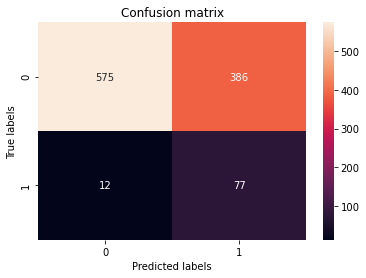

In [44]:
Results(y_train, svm_search.predict(X_train))

Balanced Accuracy Score: 0.7155723045477772
              precision    recall  f1-score   support

           0       0.98      0.54      0.69       412
           1       0.15      0.89      0.26        38

    accuracy                           0.57       450
   macro avg       0.57      0.72      0.48       450
weighted avg       0.91      0.57      0.66       450



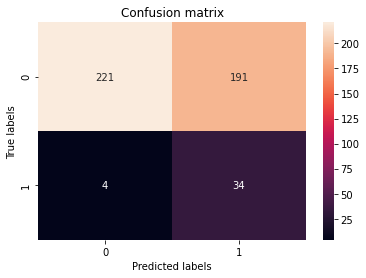

In [45]:
Results(y_test, svm_search.predict(X_test))

## KNN

### K Nearest Neighbor Classification Algorithm

It is one of the simplest and widely used classification algorithms in which a new data point is classified based on similarity in the specific group of neighboring K data points.

Hyperparameters:
1. K-neighbors - The number of the neighbors
2. knn_p -> Minkowski distance p; the Manhattan distance, p=1 and the Euclidean, p=2 .

In [46]:
ohe_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
ordinal_transformer = OrdinalEncoder(categories=[age_order, education_order] + [consumption_order] * 7)
scaler = MinMaxScaler()
transformers = ColumnTransformer([('categorical', ohe_transformer, cat_features),
                                  ('numeric', scaler, num_features)], remainder='passthrough')
knn_pipeline = Pipeline(steps=[('transform', transformers),
                                  ('knn', KNeighborsClassifier())])

In [47]:
knn_param_grid = {'knn__n_neighbors': np.arange(5, 31),
                  'knn__p': [1, 2]}

In [48]:
knn_search = GridSearchCV(knn_pipeline, knn_param_grid, scoring='balanced_accuracy', cv=3)

In [49]:
knn_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['gender',
                                                                          'country',
                                                                          'ethnicity']),
                                                                        ('numeric',
                                                                         MinMaxScaler(),
                                                                         ['personality_neuroticism',
                                                                          'personality_extraversion',
                                                                          'personality_openness',
                                                                          'personality_agreeableness',
                                                                          'pers...
                                                                          'personality_impulsiveness',
                                                                          'personality_sensation',
                                                                          'no_illicit_drugs',
                                                                          'TAD_last_day',
                                                                          'TAD_last_week',
                                                                          'TAD_last_month',
                                                                          'TAD_last_year',
                                                                          'TAD_last_decade',
                                                                          'TAD_decade_ago'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30]),
                         'knn__p': [1, 2]},
             scoring='balanced_accuracy')

In [50]:
knn_search.best_estimator_

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'country',
                                                   'ethnicity']),
                                                 ('numeric', MinMaxScaler(),
                                                  ['personality_neuroticism',
                                                   'personality_extraversion',
                                                   'personality_openness',
                                                   'personality_agreeableness',
                                                   'personality_conscientiousness',
                                                   'personality_impulsiveness',
                                                   'personality_sensation',
                                                   'no_illicit_drugs',
                                                   'TAD_last_day',
                                                   'TAD_last_week',
                                                   'TAD_last_month',
                                                   'TAD_last_year',
                                                   'TAD_last_decade',
                                                   'TAD_decade_ago'])])),
                ('knn', KNeighborsClassifier(n_neighbors=11))])

Balanced Accuracy Score: 0.543382946135229
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       961
           1       0.73      0.09      0.16        89

    accuracy                           0.92      1050
   macro avg       0.82      0.54      0.56      1050
weighted avg       0.91      0.92      0.89      1050



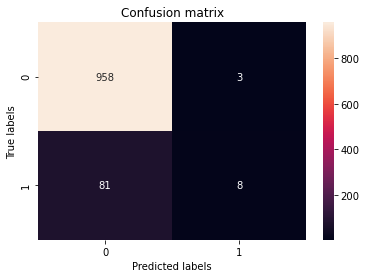

In [51]:
Results(y_train, knn_search.predict(X_train))

Balanced Accuracy Score: 0.5107307102708227
              precision    recall  f1-score   support

           0       0.92      1.00      0.95       412
           1       0.33      0.03      0.05        38

    accuracy                           0.91       450
   macro avg       0.63      0.51      0.50       450
weighted avg       0.87      0.91      0.88       450



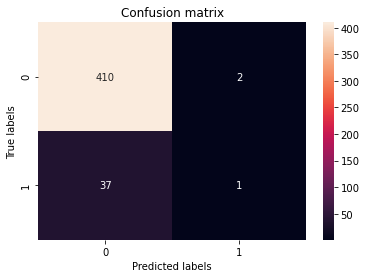

In [52]:
Results(y_test, knn_search.predict(X_test))

## Applying the best model on the test data

The best Balanced Accuracy Score is given by Logistic Regression. So we will use that model to predict on the TEST data.

###### Balanced Accuracy Score: 0.7965836149142396 (Train)
###### Balanced Accuracy Score: 0.7371614716402657 (Test)

In [53]:
logreg_best_params = log_search.best_params_

In [54]:
ohe_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
scaler = MinMaxScaler()
transformers = ColumnTransformer([('categorical', ohe_transformer, cat_features),
                                  ('numeric', scaler, num_features)], remainder='passthrough')
best_logreg_pipeline = Pipeline(steps=[('transform', transformers),
                                  ('logreg', LogisticRegression(solver='liblinear',
                                                                class_weight='balanced',
                                                                C=logreg_best_params['logreg__C'],
                                                                penalty=logreg_best_params['logreg__penalty']))])

In [55]:
best_logreg_pipeline.fit(X, y)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'country',
                                                   'ethnicity']),
                                                 ('numeric', MinMaxScaler(),
                                                  ['personality_neuroticism',
                                                   'personality_extraversion',
                                                   'personality_openness',
                                                   'personality_agreeableness',
                                                   'personality_conscientiousness',
                                                   'personality_impulsiveness',
                                                   'personality_sensation',
                                                   'no_illicit_drugs',
                                                   'TAD_last_day',
                                                   'TAD_last_week',
                                                   'TAD_last_month',
                                                   'TAD_last_year',
                                                   'TAD_last_decade',
                                                   'TAD_decade_ago'])])),
                ('logreg',
                 LogisticRegression(C=0.0006951927961775605,
                                    class_weight='balanced',
                                    solver='liblinear'))])

In [56]:
drugs_test_df = pd.read_csv('drugs_test.csv')

In [57]:
output_df = pd.DataFrame()
output_df['id'] = drugs_test_df['id']

In [58]:
drugs_test_df.head()

,id,age,gender,education,country,ethnicity,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,personality_conscientiousness,personality_impulsiveness,personality_sensation,consumption_alcohol,consumption_amphetamines,consumption_caffeine,consumption_cannabis,consumption_chocolate,consumption_mushrooms,consumption_nicotine
0,test_0001,18-24,female,"Some college or university, no certificate or ...",USA,Mixed-Black/Asian,37.7,74.2,60.2,45.6,40.6,63.0,71.1,used in last day,never used,used in last day,used in last week,used in last day,used in last decade,used in last day
1,test_0002,45-54,male,Doctorate degree,USA,Other,62.3,47.6,73.1,43.5,60.9,56.5,71.1,used in last day,used over a decade ago,used in last day,used in last decade,used in last month,never used,used in last decade
2,test_0003,45-54,female,Professional certificate/ diploma,USA,Mixed-Black/Asian,56.1,52.6,34.9,58.5,58.4,56.5,38.8,used in last week,never used,used in last day,never used,used in last day,never used,never used
3,test_0004,35-44,male,"Some college or university, no certificate or ...",Australia,Mixed-Black/Asian,71.8,50.1,45.7,39.0,42.4,63.0,46.6,used in last decade,never used,used in last day,used in last day,used in last week,never used,used in last day
4,test_0005,35-44,male,Left school at 16 years,USA,Mixed-Black/Asian,62.3,41.2,19.2,39.0,22.3,42.8,38.8,used in last decade,used in last day,used in last day,used in last day,used in last week,used over a decade ago,used in last day


No missing values in Test data

In [59]:
drugs_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             385 non-null    object 
 1   age                            385 non-null    object 
 2   gender                         385 non-null    object 
 3   education                      385 non-null    object 
 4   country                        385 non-null    object 
 5   ethnicity                      385 non-null    object 
 6   personality_neuroticism        385 non-null    float64
 7   personality_extraversion       385 non-null    float64
 8   personality_openness           385 non-null    float64
 9   personality_agreeableness      385 non-null    float64
 10  personality_conscientiousness  385 non-null    float64
 11  personality_impulsiveness      385 non-null    float64
 12  personality_sensation          385 non-null    flo

In [60]:
drugs_test_df = Feature(drugs_test_df)
drugs_test_df = clean_df(drugs_test_df, train_data=False)

In [61]:
drugs_test_df

,age,gender,education,country,ethnicity,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,personality_conscientiousness,...,consumption_chocolate,consumption_mushrooms,consumption_nicotine,no_illicit_drugs,TAD_last_day,TAD_last_week,TAD_last_month,TAD_last_year,TAD_last_decade,TAD_decade_ago
0,0,female,4,USA,Mixed-Black/Asian,37.7,74.2,60.2,45.6,40.6,...,6,2,6,0,2,1,0,0,1,0
1,3,male,8,USA,Other,62.3,47.6,73.1,43.5,60.9,...,4,0,2,0,1,0,0,0,2,1
2,3,female,5,USA,Mixed-Black/Asian,56.1,52.6,34.9,58.5,58.4,...,6,0,0,1,0,1,0,0,0,0
3,2,male,4,Australia,Mixed-Black/Asian,71.8,50.1,45.7,39.0,42.4,...,5,0,6,0,2,0,0,0,1,0
4,2,male,1,USA,Mixed-Black/Asian,62.3,41.2,19.2,39.0,22.3,...,5,1,6,0,3,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2,male,6,USA,Mixed-Black/Asian,46.2,59.7,37.2,54.2,71.1,...,5,0,2,1,0,1,0,0,1,0
381,1,male,5,USA,Mixed-Black/Asian,49.2,74.2,52.7,51.9,44.1,...,6,0,2,0,1,0,0,0,2,1
382,2,male,7,USA,Mixed-Black/Asian,62.3,85.5,55.3,76.2,51.8,...,0,0,6,0,1,1,0,0,0,1
383,5,male,7,USA,Mixed-Black/Asian,53.4,33.3,45.7,43.5,53.7,...,5,0,1,1,1,0,0,0,0,1


In [62]:
output_df['consumption_cocaine_last_month'] = pd.Series(best_logreg_pipeline.predict(drugs_test_df)).replace({0: 'No', 1: 'Yes'})

In [63]:
output_df

,id,consumption_cocaine_last_month
0,test_0001,Yes
1,test_0002,No
2,test_0003,No
3,test_0004,No
4,test_0005,Yes
...,...,...
380,test_0381,No
381,test_0382,No
382,test_0383,No
383,test_0384,No


In [64]:
output_df.to_csv('classification.csv', index=False)